In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#REading training data
df = pd.read_csv("Train_Data.csv") 

In [3]:
df.shape

(22584, 19)

In [4]:
df.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred
0,y,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,m78,0
1,y,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,m78,0
2,E,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,NaN,122.5350,11.7136,176.8200,m76,1
3,x,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,NaN,124.8030,13.8424,168.2625,m55,0
4,E,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,NaN,150.1185,m76,0


In [5]:
df.isnull().sum() #checking for existence and frequency of null values

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64

OBSERVATION : The columns m0,m1 and m2 have no null values, so there will be no need of imputation for these columns

Skew() tells us how normally distributed a feature is . If skew value ranges from -0.5 to 0.5 , then it has a low skew in which case we can replace the null values by median , otherwise for data with high skew values , median is preferred for imputation


In [6]:
df.skew(axis = 0) 

C:\Users\harsh\AppData\Local\Temp\ipykernel_15372\3527348084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0)


ld      0.947883
m0      0.694593
m1      0.476701
m2      0.587808
m3     -0.012681
m4      0.014183
m5      0.010545
m6     -0.009473
m7     -0.018630
m8      0.016980
m9     -0.009953
m10    -0.035048
m11    -0.094557
m12    -0.056440
m13     0.240490
m14    -0.051753
pred    1.381995
dtype: float64

The "ld" column has high skew value , so we will use median but let's double check that using box plot

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ld'>

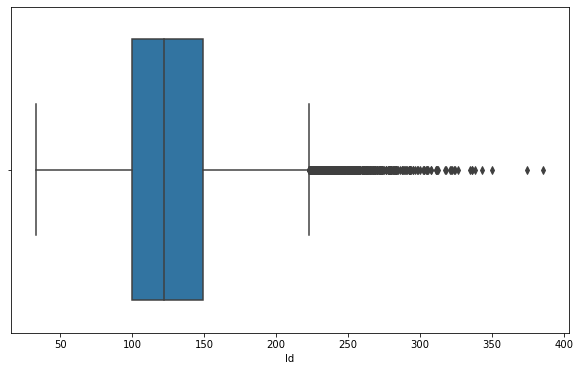

In [7]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(df.ld)

Clearly , we can not use mean imputation as there are large number of outliers

In [8]:
#ld column is heavily skewed as 0.95 > 0.5 so median imputation is preferred

In [9]:
med = df.ld.median()
df.ld.fillna(med,inplace = True)
df.ld.isnull().sum()

0

The rest of the columns are not heavily skewed , so mean imputation works for all of them

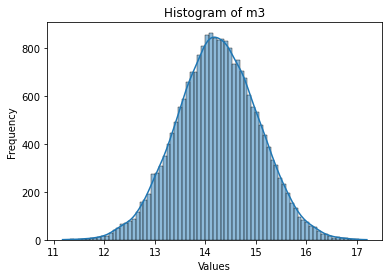

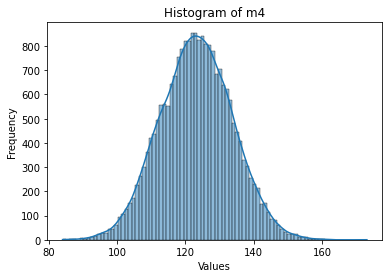

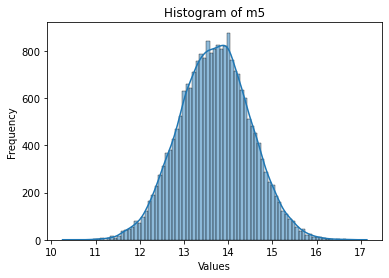

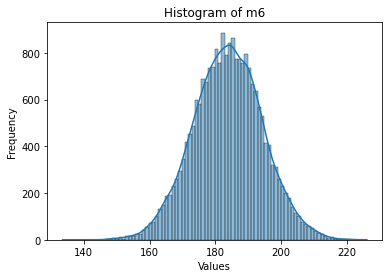

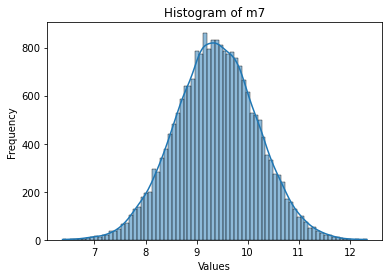

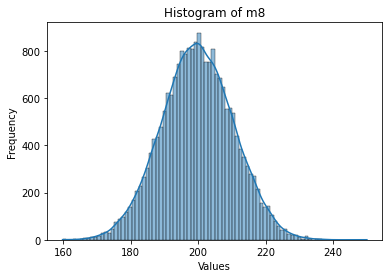

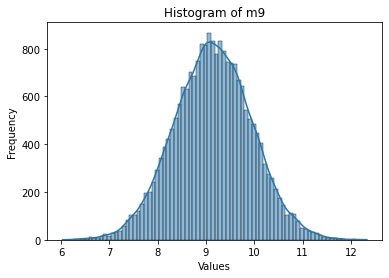

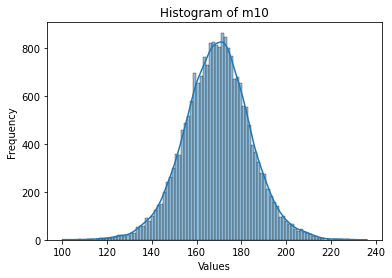

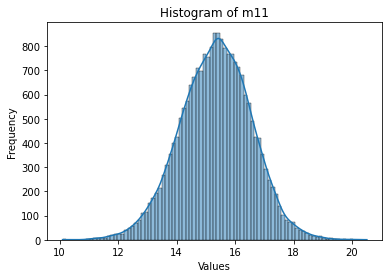

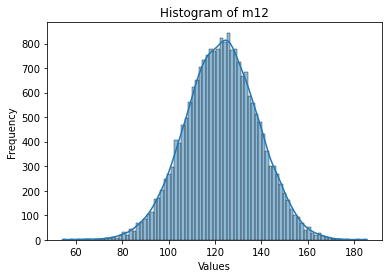

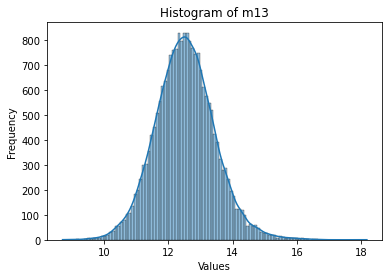

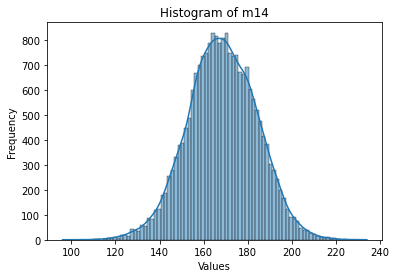

In [10]:
#Visualising that these columns are normally distributed

# Select the columns from 'm3' to 'm14'
columns = ['m3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14']

# Iterate over each column and plot individual histograms
for column in columns:

    sns.histplot(data=df[column], bins='auto', kde=True)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [11]:
columns_to_fill = ['m3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14']

# Fill NaN values with column means
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())
df.isnull().sum()

pc      0
ld      0
m0      0
m1      0
m2      0
m3      0
m4      0
m5      0
m6      0
m7      0
m8      0
m9      0
m10     0
m11     0
m12     0
m13     0
m14     0
ma      0
pred    0
dtype: int64

# All null values successfully removed

Now , the two categorical columns 'pc' and 'ma' need to be encoded here as only numerical data can be modelled in this case where I am using XGBoost model

In [12]:
df = pd.get_dummies(df,columns = ['pc','ma'],prefix = ['pc','ma'])
df.head()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,...,pred,pc_E,pc_w,pc_x,pc_y,pc_z,ma_m55,ma_m75,ma_m76,ma_m78
0,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,...,0,0,0,0,1,0,0,0,0,1
1,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,...,0,0,0,0,1,0,0,0,0,1
2,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,...,1,1,0,0,0,0,0,0,1,0
3,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,...,0,0,0,1,0,0,1,0,0,0
4,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,...,0,1,0,0,0,0,0,0,1,0


# Feature Scaling can significantly increase accuracy of model but since it is XGBoost which is almost insesitive to feature scaling , we are scaling only the "ld" column , not all of them

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ld_column = df['ld'].values.reshape(-1, 1)

# Apply min-max scaling
scaled_ld = scaler.fit_transform(ld_column)

# Update the 'ld' column in the DataFrame with the scaled values
df['ld'] = scaled_ld

After building the model , feature_importance suggests that these 3 are the least relevant columns , thus dropping them here before training itself 

In [14]:
df = df.drop(['m0','m1','m2','m12'],axis = 1)

Defining the data(X) and target(Y) columns 

In [15]:
X = df.drop('pred',axis = 1)
y = df.pred

Splitting the data into training and testing set to build the model 

In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

# Now importing test data


In [17]:
new_data = pd.read_csv("Test_Data.csv")

In [18]:
new_data.head()

,index,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,0,E,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,m76
1,1,y,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,m78
2,2,w,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,m78
3,3,z,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,m75
4,4,x,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,NaN,157.6470,m55


# Cleaning the test data exactly the same way as training data

In [19]:
new_data.skew(axis = 0)

C:\Users\harsh\AppData\Local\Temp\ipykernel_15372\1401083288.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.skew(axis = 0)


index    0.000000
ld       1.008613
m0       0.770973
m1       0.474708
m2       0.617869
m3       0.060764
m4      -0.036484
m5       0.028876
m6      -0.012267
m7      -0.018647
m8       0.006886
m9       0.035564
m10     -0.007866
m11     -0.169240
m12     -0.034884
m13      0.218457
m14     -0.089538
dtype: float64

In [20]:
# Assuming your DataFrame is called 'df4'
columns_to_fill = ['m3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14']

# Fill NaN values with column means
new_data[columns_to_fill] = new_data[columns_to_fill].fillna(new_data[columns_to_fill].mean())
new_data.isnull().sum()

index     0
pc        0
ld       28
m0        0
m1        0
m2        0
m3        0
m4        0
m5        0
m6        0
m7        0
m8        0
m9        0
m10       0
m11       0
m12       0
m13       0
m14       0
ma        0
dtype: int64

In [21]:
new_data = pd.get_dummies(new_data,columns = ['pc','ma'],prefix = ['pc','ma'])
new_data.head()

,index,ld,m0,m1,m2,m3,m4,m5,m6,m7,...,m14,pc_E,pc_w,pc_x,pc_y,pc_z,ma_m55,ma_m75,ma_m76,ma_m78
0,0,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,...,166.1100,1,0,0,0,0,0,0,1,0
1,1,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,...,177.7230,0,0,0,1,0,0,0,0,1
2,2,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,...,185.6085,0,1,0,0,0,0,0,0,1
3,3,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,...,180.2745,0,0,0,0,1,0,1,0,0
4,4,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,...,157.6470,0,0,1,0,0,1,0,0,0


In [22]:
med_n = new_data.ld.median()
new_data.ld.fillna(med,inplace = True)
new_data.ld.isnull().sum()

0

In [23]:
new_data.columns

Index(['index', 'ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8',
       'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'pc_E', 'pc_w', 'pc_x', 'pc_y',
       'pc_z', 'ma_m55', 'ma_m75', 'ma_m76', 'ma_m78'],
      dtype='object')

# TEST DATA CLEANING OVER 

Now , we build our model . Since it is a binary classification problem , we use a classifier - XGBClassifier

In [24]:
from xgboost import XGBClassifier

# Create an XGBoost classifier with L1 regularization
xgb_clf = XGBClassifier(reg_alpha=2.0, objective='binary:logistic',n_estimators = 300)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Make predictions
pred = xgb_clf.predict(X_test)

The next two cells were operated before dropping the columns m0,m1,m2 and m12 , so the results below are different .For better understanding , run these two cells before dropping the columns

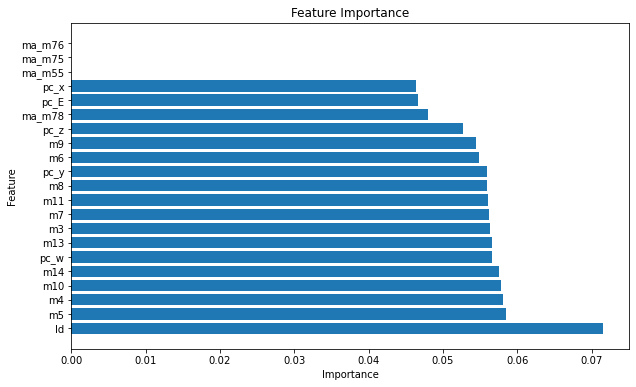

In [25]:
importance = xgb_clf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [26]:
feature_importance_df

,Feature,Importance
0,ld,0.071495
3,m5,0.058476
2,m4,0.058078
8,m10,0.057859
11,m14,0.057591
13,pc_w,0.056558
10,m13,0.056545
1,m3,0.056307
5,m7,0.056151
9,m11,0.056108


Clear enough , m0,m1 and m2 have very less importance so they are dropped from both the training and testing set

In [27]:
new_data = new_data.drop(['m0','m1','m2','m12'],axis = 1)

Now , predicting the unknown test data set using our classifier

In [28]:
pred = xgb_clf.predict(new_data.drop('index',axis = 1))

In [29]:
#checking unique values of np.unique
np.unique(pred)

array([0, 1])

In [30]:
#checking the frequency of 1
np.count_nonzero(pred == 1)

1770

In [31]:
#Save predictions as a data frame
pred_df = pd.DataFrame({'pred': pred})

# Save predictions to a CSV file
pred_df.to_csv('predictions_svc_exp_minmax_dropped_1.csv', index=False)